# Clustering 
## HELP Internation case study
This analysis presents the group of countries or cluster of the countries based on various parameters such as socio-economic and health factors that determine the overall development of country.

## Reading and understanding the data

In [1]:
# Importing all the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out the warnings
import warnings 
warnings.filterwarnings('ignore')

# Setting the plots visuals
sns.set()
%config InlineBackend.figure_format='retina'

In [2]:
# Importing and reading the dataset
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# Checking out the rows and columns in the dataset
data.shape

(167, 10)

In [4]:
# About the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Checking the statistical summary of the dataset
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
# Checking for null values
col = data.columns
for i in col:
    print(f'null values in {i} column: {data[i].isnull().sum()}')

null values in country column: 0
null values in child_mort column: 0
null values in exports column: 0
null values in health column: 0
null values in imports column: 0
null values in income column: 0
null values in inflation column: 0
null values in life_expec column: 0
null values in total_fer column: 0
null values in gdpp column: 0


In [7]:
# Rearranging the variables as per the original values
rearranging_cols = ["exports","health","imports"]
for i in rearranging_cols:
    data[i] = data["gdpp"]*(data[i]/100)

## EDA - Exploratory Data analysis

In [8]:
# Tree map of columns as per the decreasing order of values in the oolumn
import plotly.express as px
for i in enumerate(data.columns[1:]):
    fig = px.treemap(data, path=["country"],values=data[i[1]],title=i[1])
    fig.show()

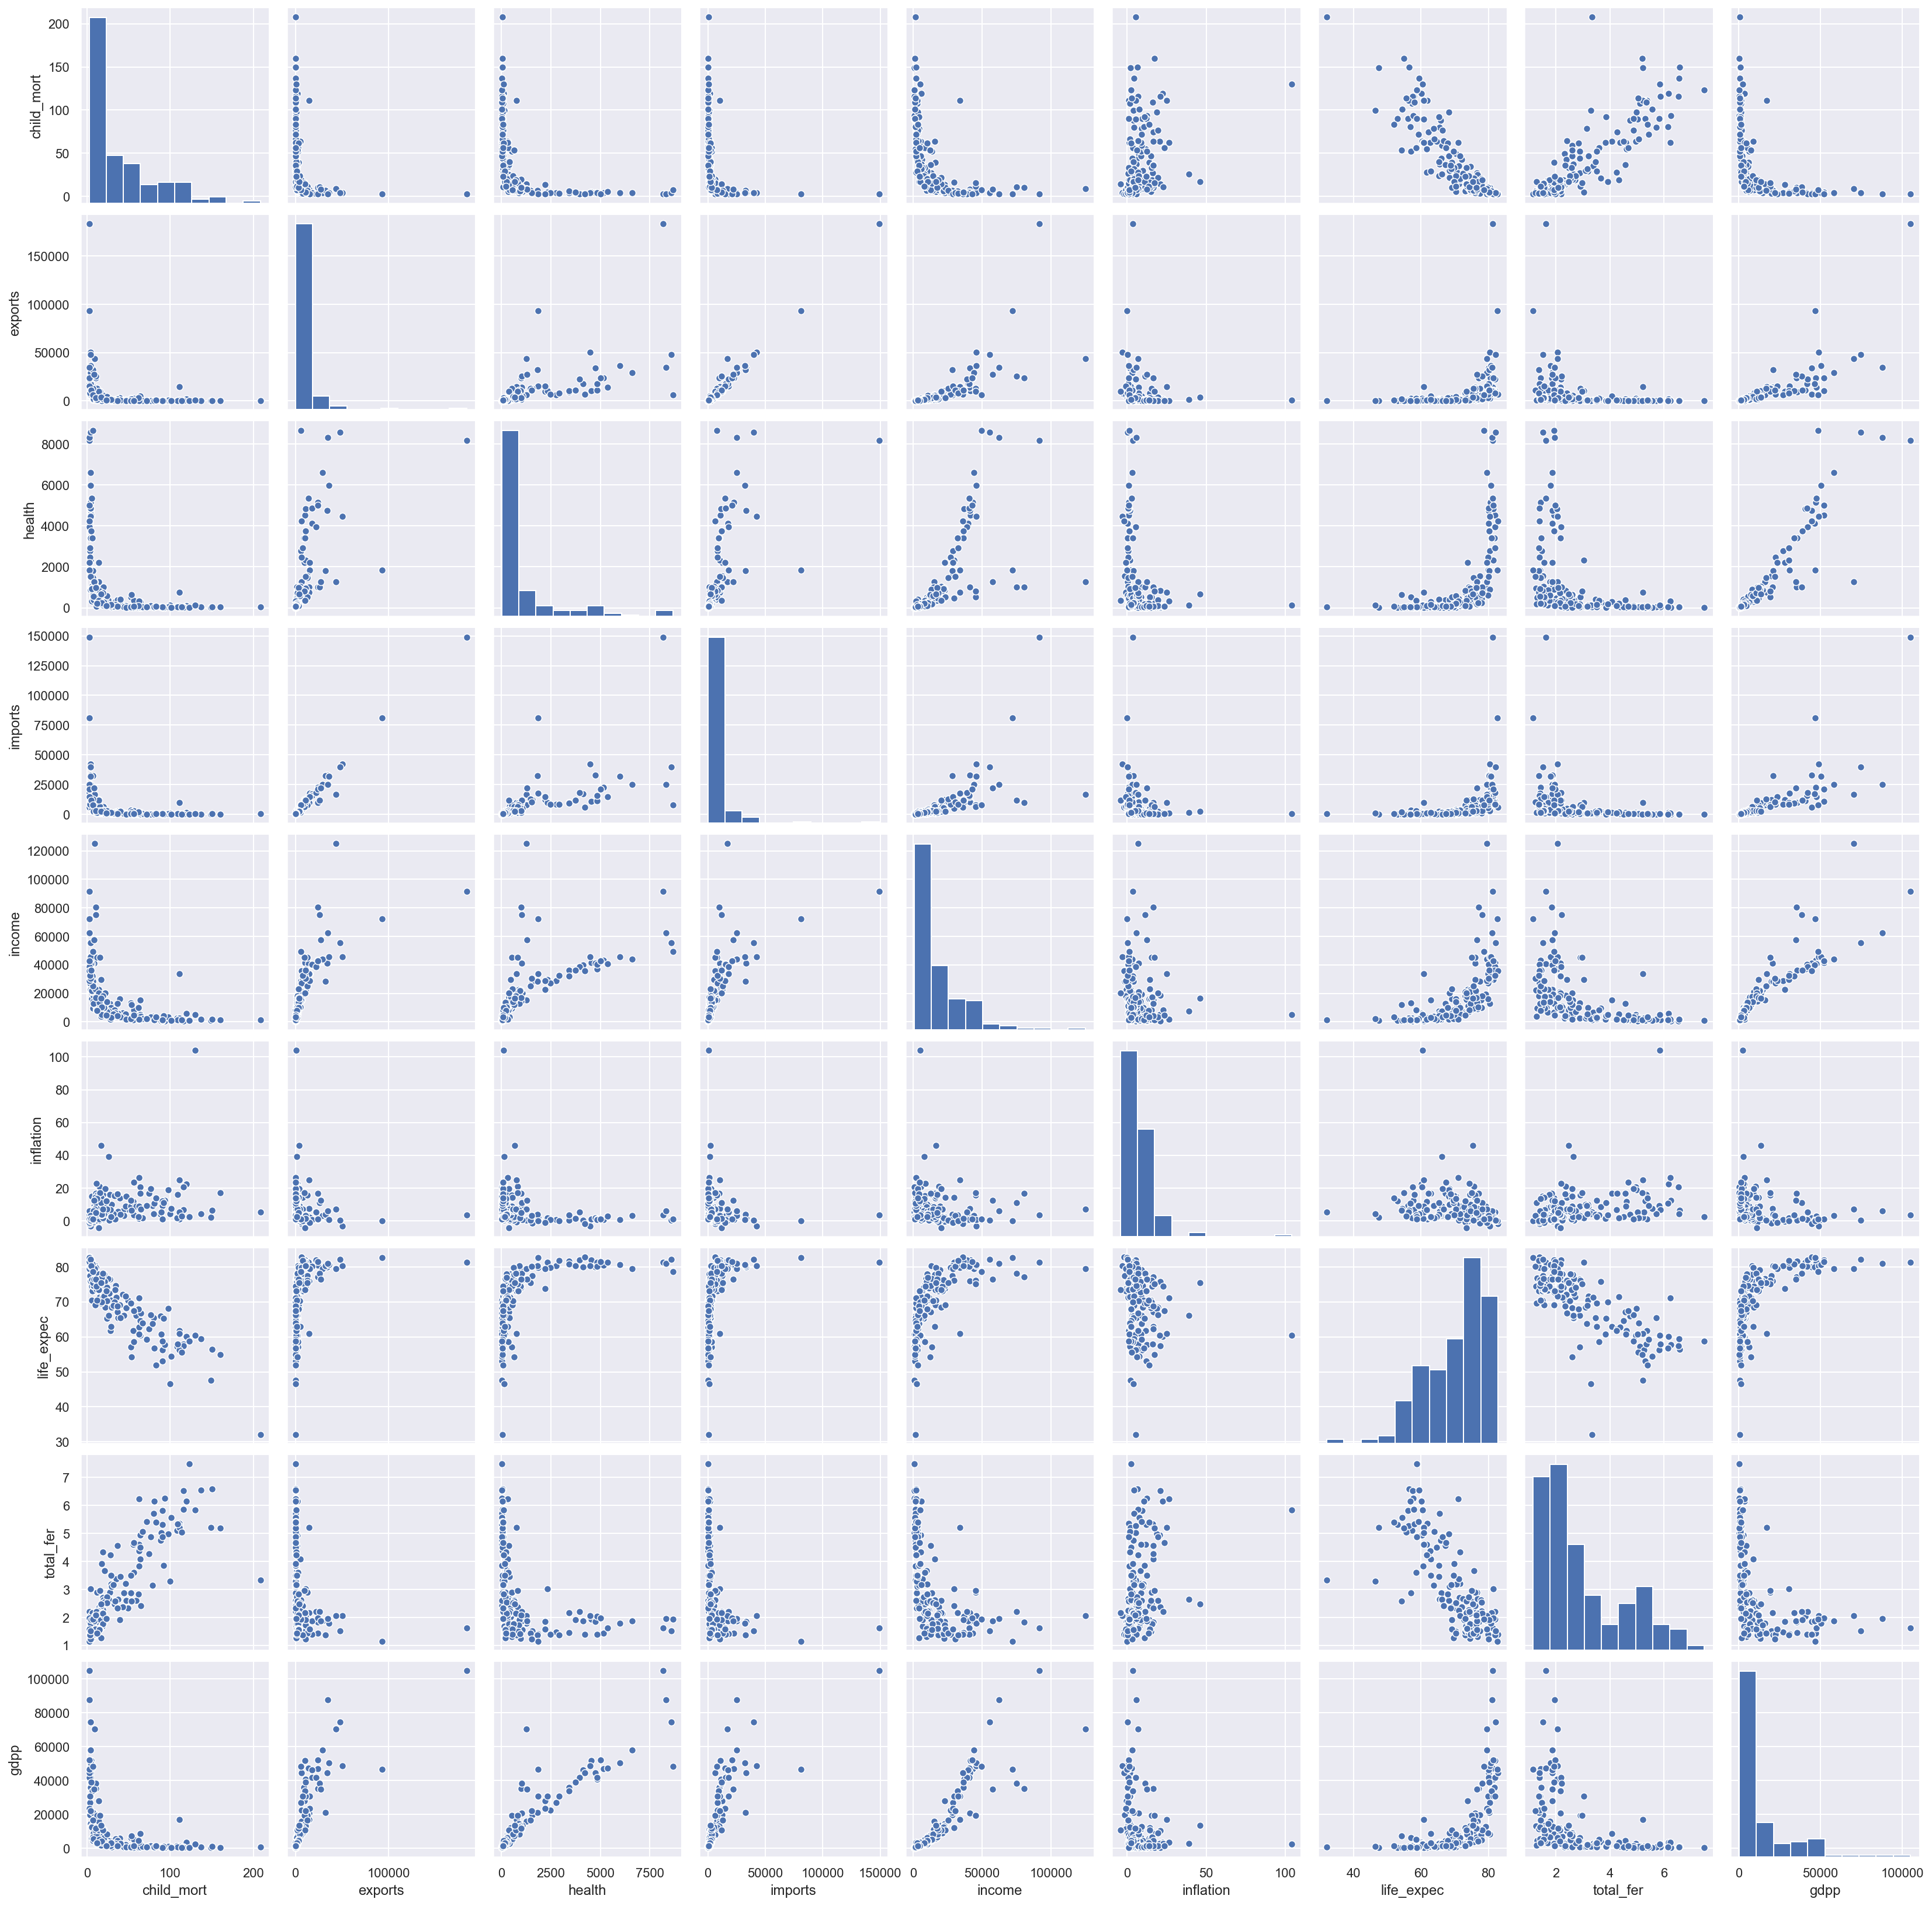

In [9]:
# pair plot for dataset
sns.pairplot(data)
plt.show()

##### From the plots above it an been seen that some of the variables which are linearly varying with each other are listed down below:
- child_mort and life_expec
- child_mort and total_fer
- exports and imports
- exports and income
- exports and gddp
- health and gddp
- health and income
- imports and exports
- imports and gddp
- child_mort and total_fer

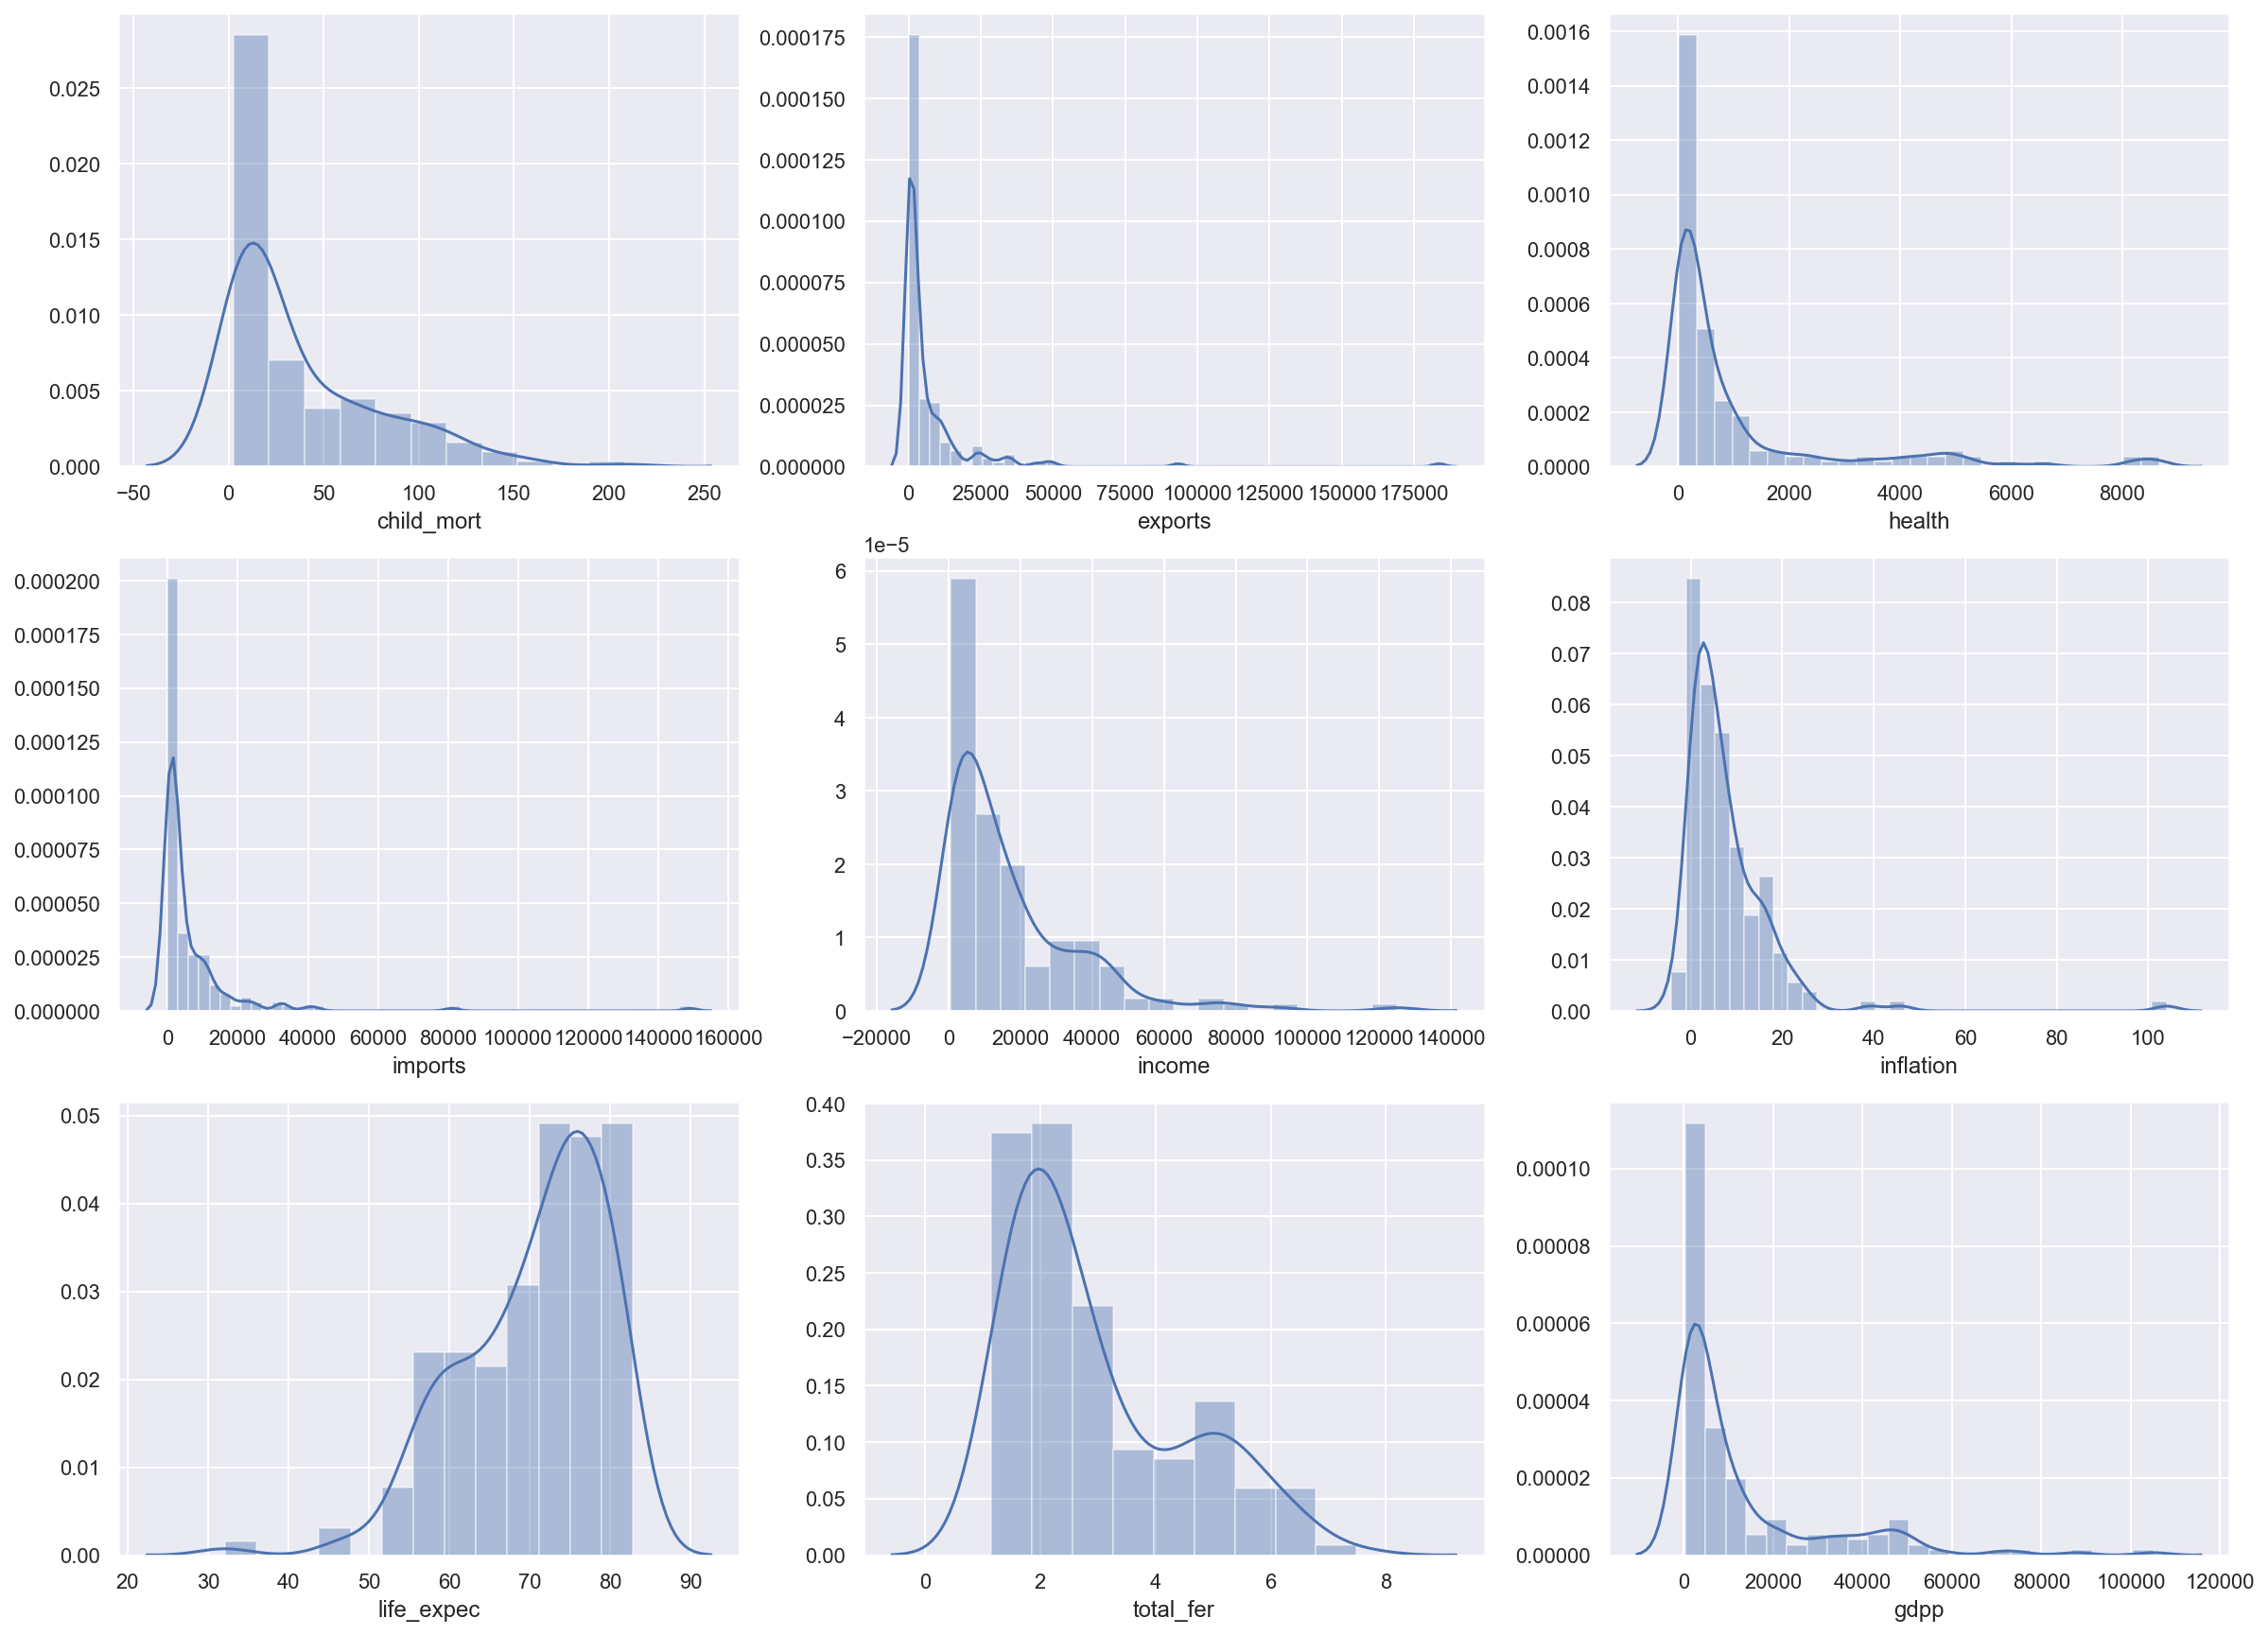

In [10]:
# displot for the different variables
col = data.columns[1:]
plt.figure(figsize=(20,15))
for i in enumerate(col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]])

##### Most of the above plots are not normally distributed or sleft/right skewed.
- Inflation and Child mortality the the distribution has a mean around 10 but also it is right skewed.
- Import and Export are centered around 40 which means most of the countries have exports per capita around 40.
- Health is more likely to be normally distributed and has a peak around 5.
- Income and GDPP are right skewed and has a peak around 6000-7000.

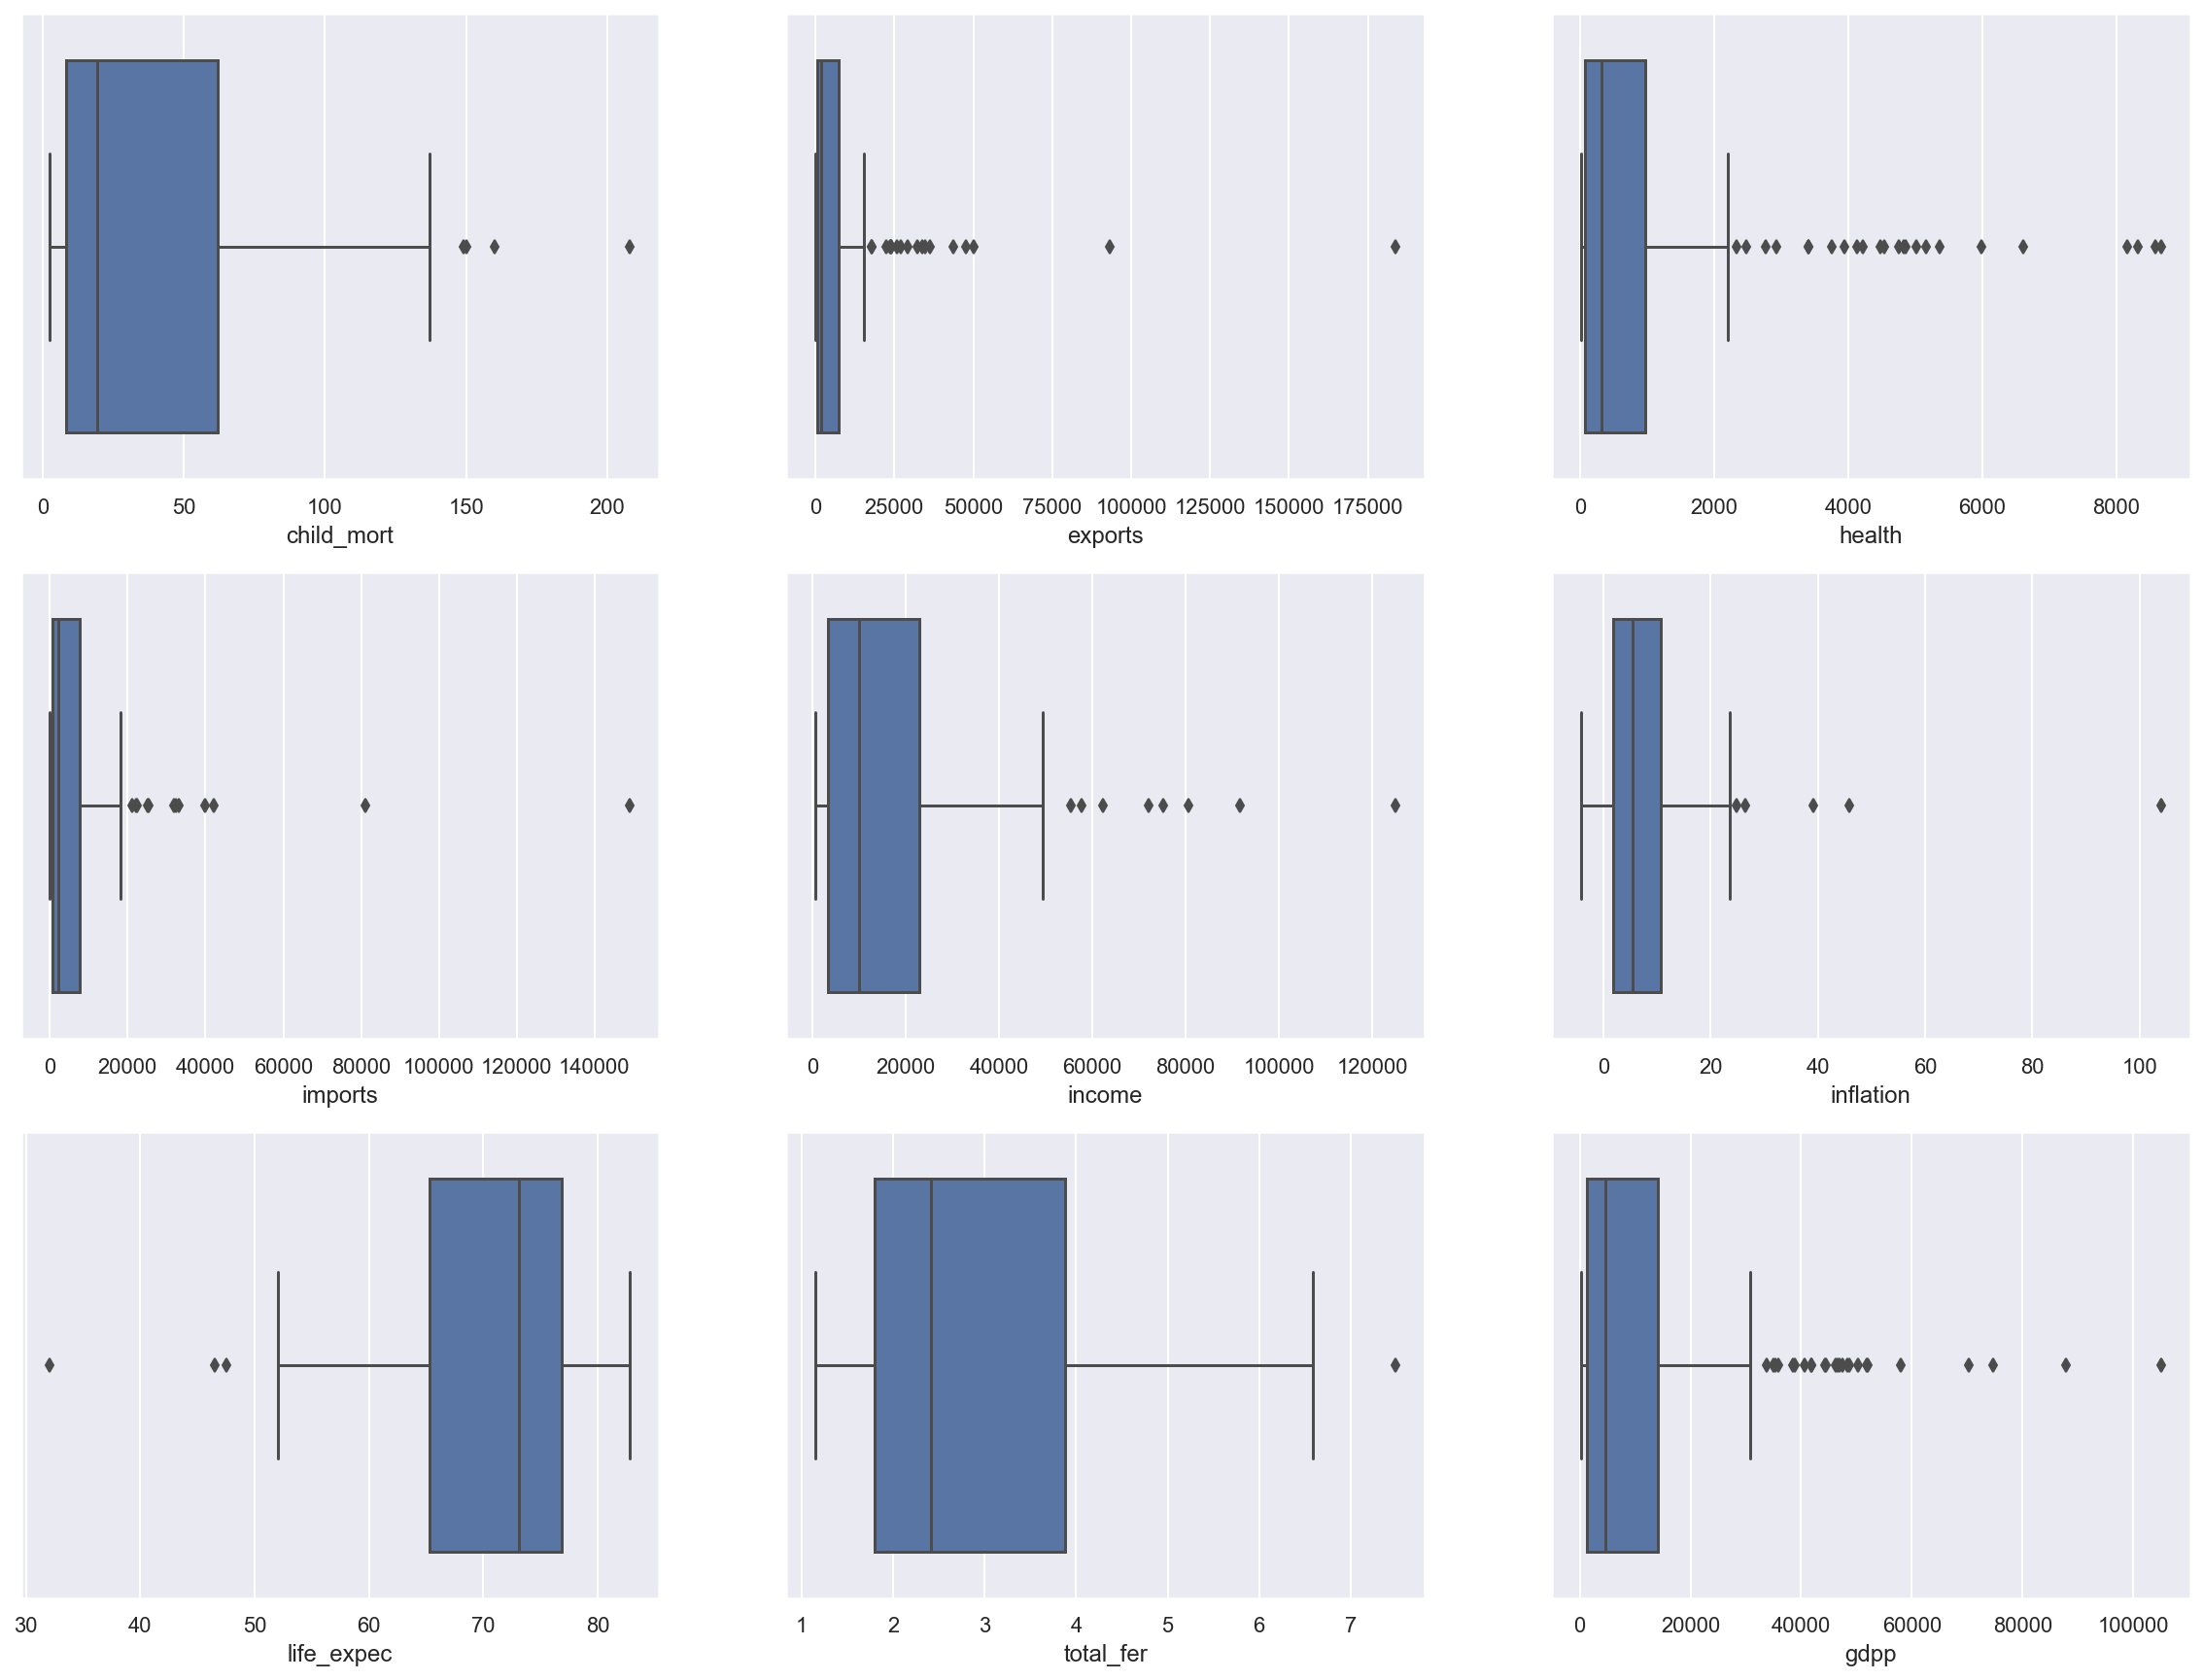

In [11]:
# Boxplots of variables for checking the outiers present in the columns.
col = data.columns[1:]
plt.figure(figsize=(20,15))
for i in enumerate(col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

##### Given below are certain columns in which top range outliers has not been removed or dealt with because they have dont have any point below the lower wiskers and values above the top whisker will be critical in deciding the contries in need of aid.
- child_mort
- total_fer
- inflation

##### However, for the columns given below the top or bottom range outliers have been removed as they will no be useful for the analysis.

- exports
- imports
- health
- income
- life_expec
- gdpp

## Outlier treatment

In [12]:
# setting the scale for outliers
col_with_out = ["exports","imports","health","income","life_expec","gdpp"]
for i in col_with_out:
    q1 = data[i].quantile(0.03)
    q3 = data[i].quantile(0.97)
    data[i][data[i] < q1] = q1
    data[i][data[i] > q3] = q3

## Checking the Hopkins value for the dataset

In [13]:
# By looking at the Hopkins value we can say that the data has high cluster tendency, 
# therefore clustring can be done in the dataset.
from pyclustertend import hopkins
print(f'Hopkins value for the dataset: {1-hopkins(data.iloc[:,1:],data.shape[1])}')

Hopkins value for the dataset: 0.92792499004815


## Scalin the variables

In [14]:
# Scaling the dataset for appliyng KMeans to the numeric variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(data.iloc[:,1:])
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data.columns[1:]
scaled_data.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.643666 -0.607096 -0.673162 -0.906157   0.157336   -1.784264   
1   -0.538949 -0.525845 -0.463143 -0.450047 -0.394968  -0.312347    0.674988   
2   -0.272833 -0.464426 -0.515323 -0.525379 -0.212488   0.789274    0.699458   
3    2.007808 -0.411762 -0.569710 -0.510765 -0.642575   1.387054   -1.307095   
4   -0.695634 -0.048963 -0.165165  0.216701  0.168446  -0.601749    0.736164   

   total_fer      gdpp  
0   1.902882 -0.748464  
1  -0.859973 -0.520397  
2  -0.038404 -0.496540  
3   2.128151 -0.556506  
4  -0.541946  0.002537

## Using K-Means algorithm to find the number of clusters

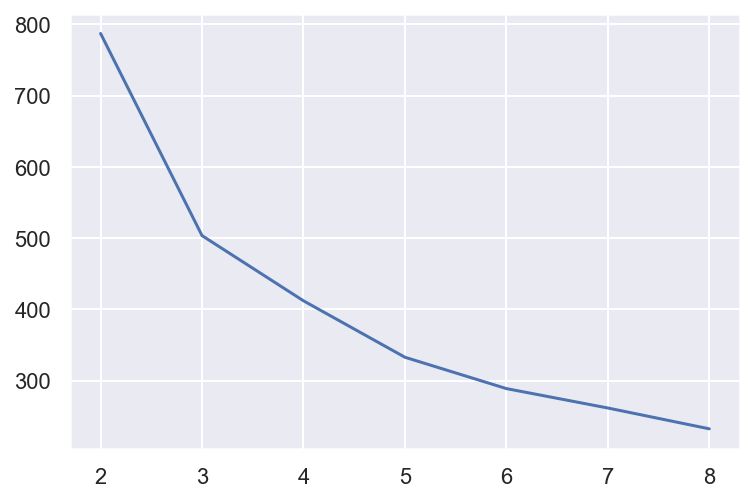

In [15]:
# Using elbow curve checking the the number of clusters between 2 to 9 that suits the dataset the best
from sklearn.cluster import KMeans
ssd = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    
    ssd.append([i,kmeans.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])
plt.show()

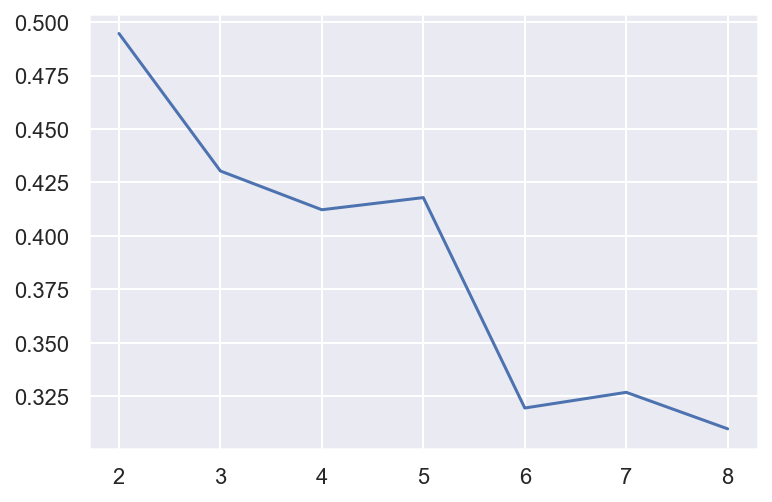

In [16]:
# Checking the silhoutte-score for the number of clusters
from sklearn.metrics import silhouette_score
sil_sc = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    
    sil_sc.append([i,silhouette_score(scaled_data,kmeans.labels_)])
    
sil_sc = pd.DataFrame(sil_sc)
plt.plot(sil_sc[0],sil_sc[1])
plt.show()

From elbow curve it can be seen that the sum of squared error is significantly reduced from 2 clusters to 3 clusers but after that even increasing the clusters is not making much of the difference,also the silhouette score for 3 clusters are 0.425 which is also a good value(varies from -1 to 1),therefore number of clusters is considered as 3.
If we take it from the problem aspects as well the it is easy to define the countries into 3 clusters as develpoing, emerging and developed countries.

In [17]:
# Here in this case we can choose the number of clusters to be 3 from elbow curve
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_data)
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [18]:
# From the 3 clusters the labels has been given to the particaular country
data["Cluster_ID"] = kmeans.labels_
data.head()

country  child_mort      exports    health   imports   income  \
0          Afghanistan        90.2    56.685328   41.9174   248.297   1610.0   
1              Albania        16.6  1145.200000  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.640000  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.190000  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.000000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_ID  
0       9.44        56.2       5.82    553.0           0  
1       4.49        76.3       1.65   4090.0           1  
2      16.10        76.5       2.89   4460.0           1  
3      22.40        60.1       6.16   3530.0           0  
4       1.44        76.8       2.13  12200.0           1

In [19]:
# Total number of countries in each cluster
data.Cluster_ID.value_counts()

1    89
0    48
2    30
Name: Cluster_ID, dtype: int64

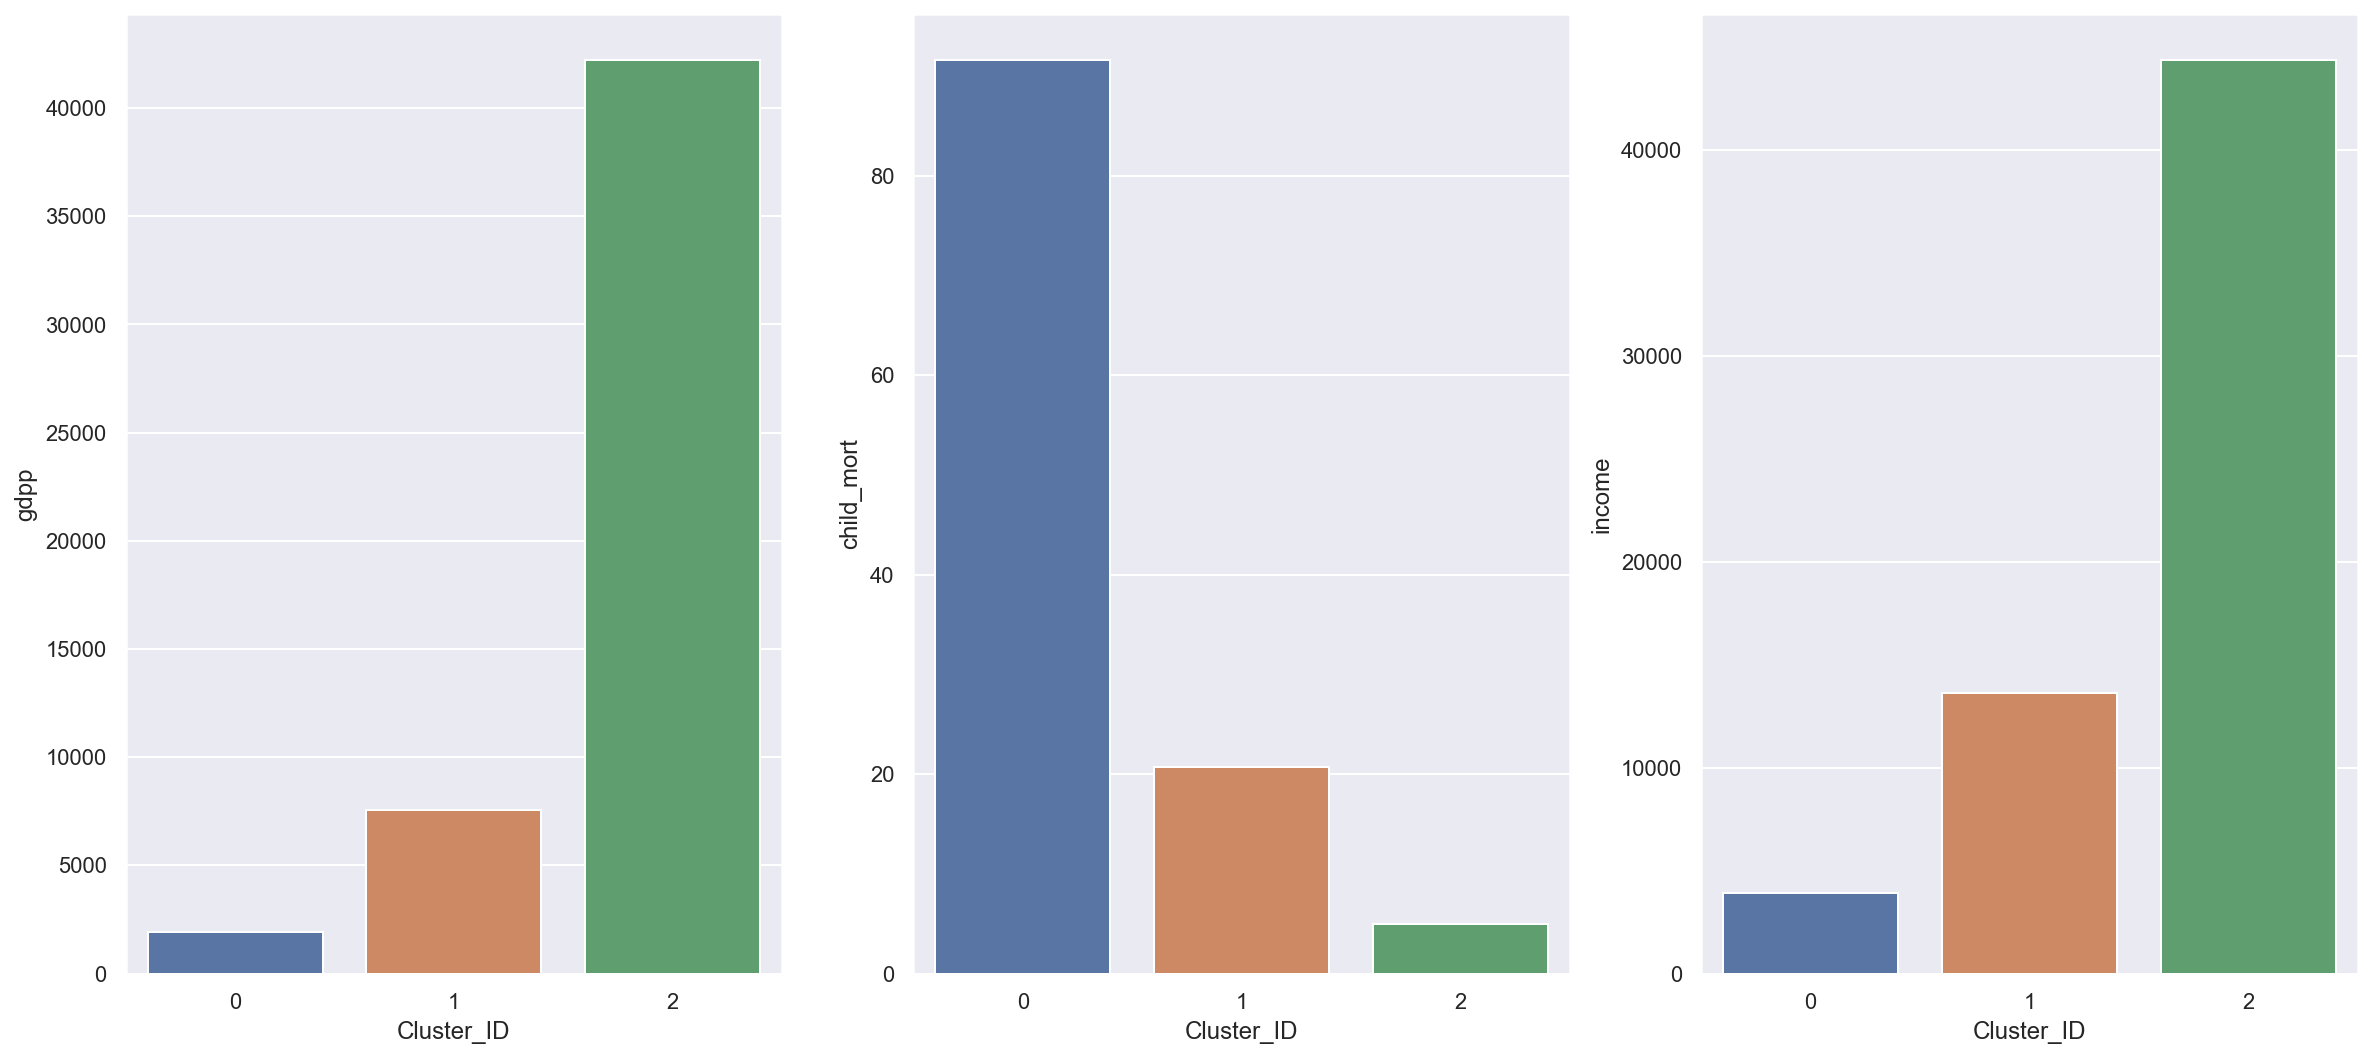

In [20]:
c = data[["gdpp","child_mort","income"]]
plt.figure(figsize=(20,30))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x="Cluster_ID",y=data[i[1]],data=data,ci=None)

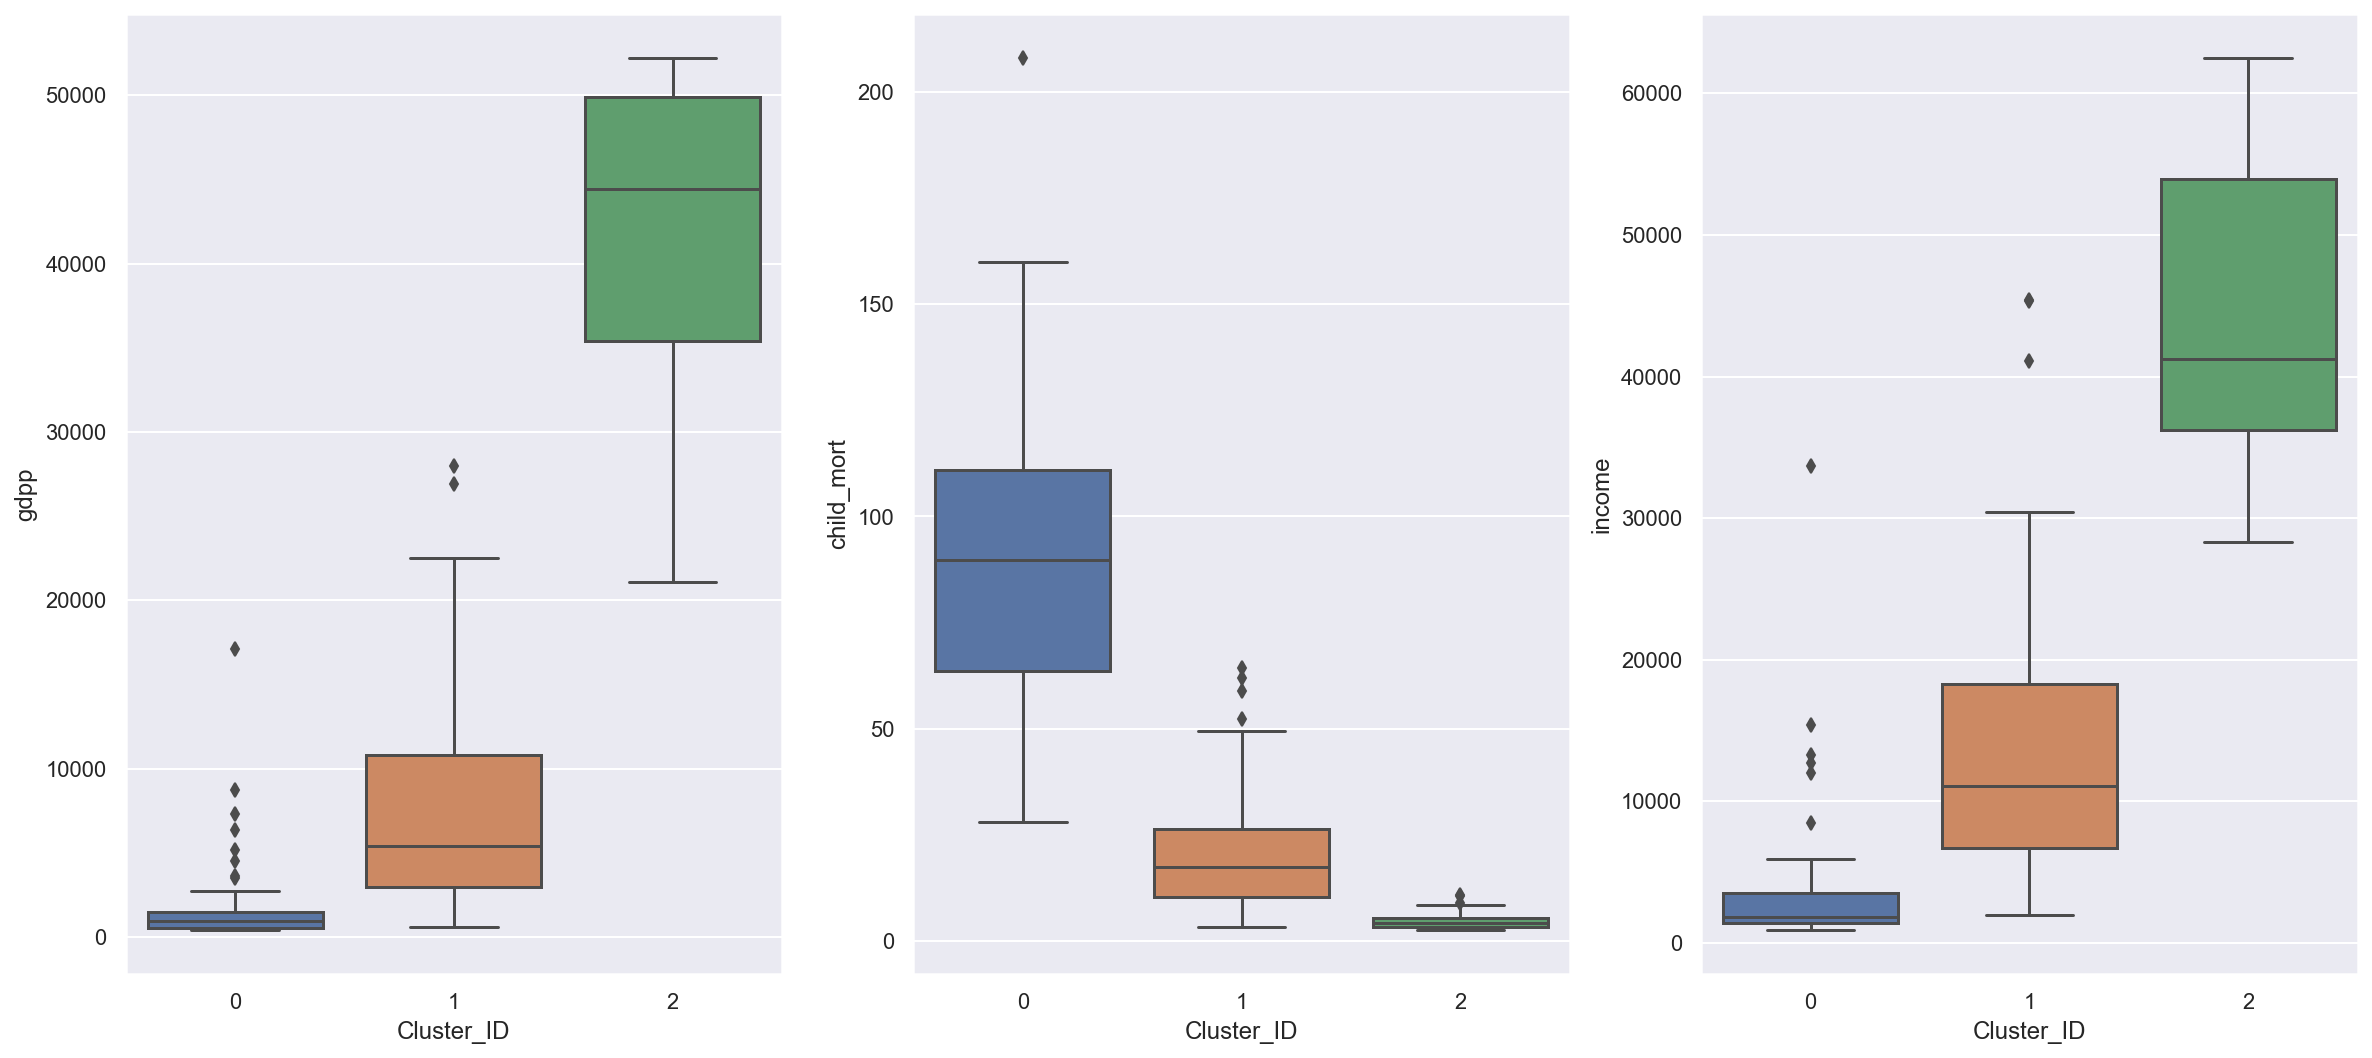

In [21]:
c = data[["gdpp","child_mort","income"]]
plt.figure(figsize=(20,30))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x="Cluster_ID",y=data[i[1]],data=data)

From the above plots some of the inferences has been listed below:
- Group-0: Low GDDP and Income whereas the Child mortality is high 
- Group-1: Low GDDP and Child mortality but relatively high Income
- Group-2: High GDDP and Income whereas the Child mortality is low

###### It can be seen that there has been a very clear distinction between three of the groups on the basis of the parameters chosen from the dataset, however these three type of countries can be divided in three groups,
#### - Group-0: Developing countries
#### - Group-1: Emerging countries
#### - Group-2: High-income or Developed countries

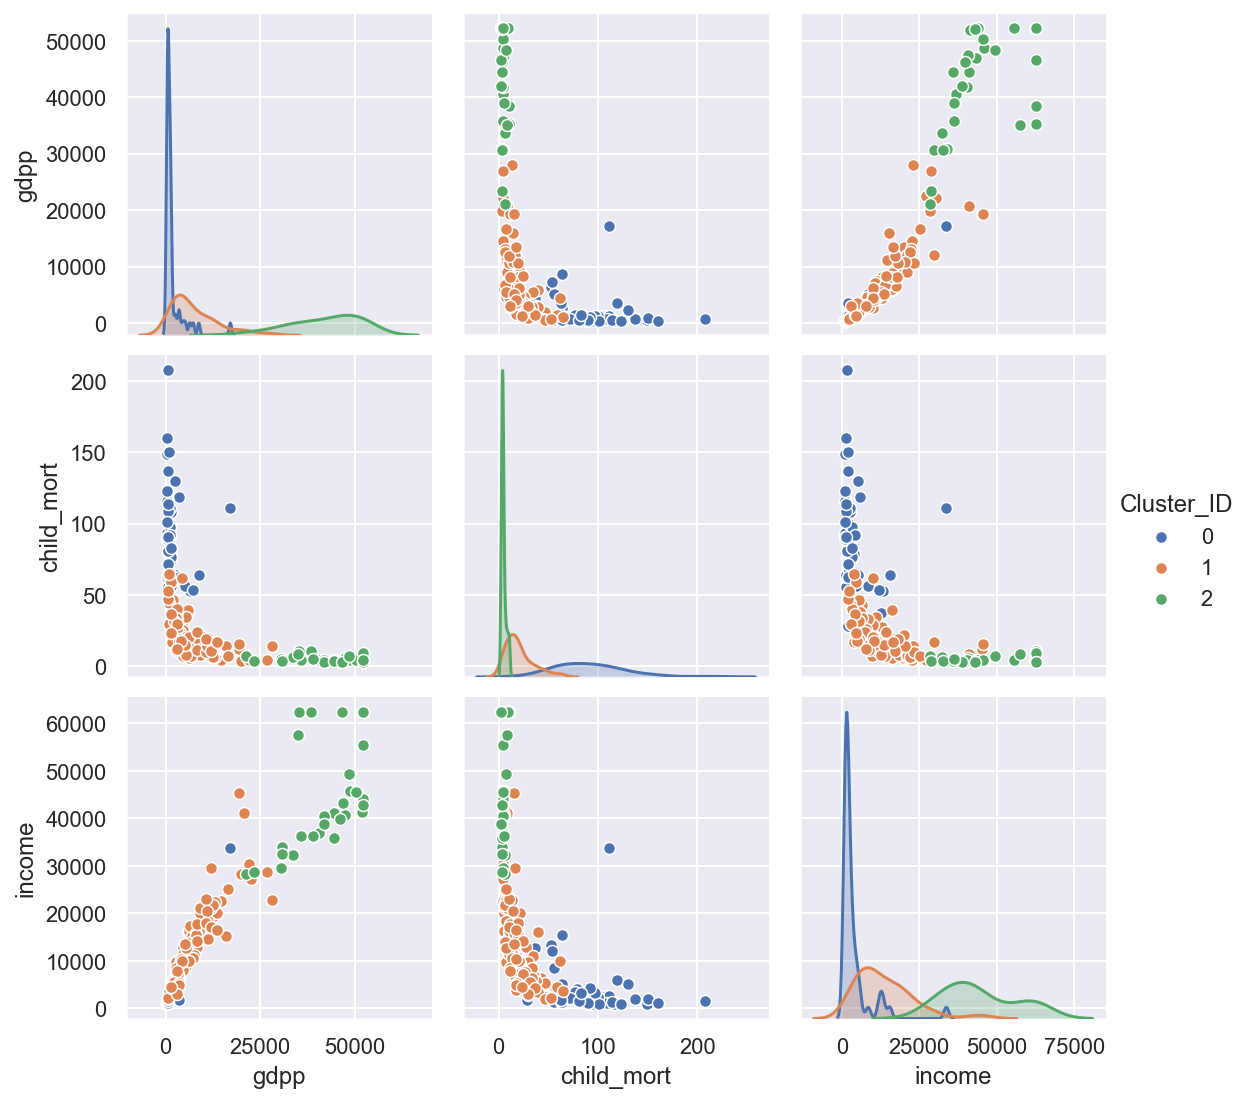

In [22]:
pairplot = data[["gdpp","child_mort","income","Cluster_ID"]]
sns.pairplot(pairplot,hue="Cluster_ID")
plt.show()

Some inference from the above pair plots:
- GDDP and Income have a liner relationship in which 'Group-2 or Developed is at the top' and 'Group-1' in the middle where as the 'Group-0' at bottom near the origin.
- GDDP and Child mortality shows the expected behaviour wherein the 'Group-0 or Developing countries' lies near the X-axis which mean that the GDP of the country is low and child mortality rate is high on contrary to that 'Group-2 or Developed countries' near the Y-axis and 'Group-1 or Emerging countries' in between

In [23]:
# Average valuees for various factors on which 
round(data.groupby("Cluster_ID")["gdpp","child_mort","income"].mean(),2)

gdpp  child_mort    income
Cluster_ID                                
0            1918.05       91.61   3914.27
1            7552.49       20.73  13626.85
2           42219.67        4.97  44372.67

In [24]:
# Group-0: Developing countries
data[data['Cluster_ID']==0].head(10)

country  child_mort      exports      health     imports  \
0                Afghanistan        90.2    56.685328   41.917400   248.29700   
3                     Angola       119.0  2199.190000  100.605000  1514.37000   
17                     Benin       111.0   180.404000   31.078000   281.97600   
21                  Botswana        52.5  2768.600000  527.050000  3257.55000   
25              Burkina Faso       116.0   110.400000   38.755000   170.20000   
26                   Burundi        93.6    56.685328   26.796000   159.74028   
28                  Cameroon       108.0   290.820000   67.203000   353.70000   
31  Central African Republic       149.0    56.685328   21.782574   159.74028   
32                      Chad       150.0   330.096000   40.634100   390.19500   
36                   Comoros        88.2   126.885000   34.681900   397.57300   

     income  inflation  life_expec  total_fer     gdpp  Cluster_ID  
0    1610.0      9.440      56.200       5.82   553.00           0  
3    5900.0     22.400      60.100       6.16  3530.00           0  
17   1820.0      0.885      61.800       5.36   758.00           0  
21  13300.0      8.920      57.100       2.88  6350.00           0  
25   1430.0      6.810      57.900       5.87   575.00           0  
26    917.4     12.300      57.700       6.26   412.72           0  
28   2660.0      1.910      57.300       5.11  1310.00           0  
31    917.4      2.010      54.276       5.21   446.00           0  
32   1930.0      6.390      56.500       6.59   897.00           0  
36   1410.0      3.870      65.900       4.75   769.00           0

In [25]:
# Group-1: Emerging countries
data[data['Cluster_ID']==1].head(10)

country  child_mort   exports     health    imports   income  \
1               Albania        16.6   1145.20   267.8950   1987.740   9930.0   
2               Algeria        27.3   1712.64   185.9820   1400.440  12900.0   
4   Antigua and Barbuda        10.3   5551.00   735.6600   7185.800  19100.0   
5             Argentina        14.5   1946.70   834.3000   1648.000  18700.0   
6               Armenia        18.1    669.76   141.6800   1458.660   6700.0   
9            Azerbaijan        39.2   3171.12   343.3920   1208.880  16000.0   
10              Bahamas        13.8   9800.00  2209.2000  12236.000  22900.0   
11              Bahrain         8.6  14386.50  1028.7900  10536.300  41100.0   
12           Bangladesh        49.4    121.28    26.6816    165.244   2440.0   
13             Barbados        14.2   6320.00  1275.2000   7792.000  15300.0   

    inflation  life_expec  total_fer     gdpp  Cluster_ID  
1       4.490        76.3       1.65   4090.0           1  
2      16.100        76.5       2.89   4460.0           1  
4       1.440        76.8       2.13  12200.0           1  
5      20.900        75.8       2.37  10300.0           1  
6       7.770        73.3       1.69   3220.0           1  
9      13.800        69.1       1.92   5840.0           1  
10     -0.393        73.8       1.86  28000.0           1  
11      7.440        76.0       2.16  20700.0           1  
12      7.140        70.4       2.33    758.0           1  
13      0.321        76.7       1.78  16000.0           1

In [26]:
# Group-2: High-income or Developed countries
data[data['Cluster_ID']==2].head(10)

country  child_mort  exports    health    imports   income  inflation  \
7   Australia         4.8  10276.2  4530.870  10847.100  41400.0      1.160   
8     Austria         4.3  24059.7  5159.000  22418.200  43200.0      0.873   
15    Belgium         4.5  33921.6  4750.800  32507.456  41100.0      1.880   
23     Brunei        10.5  23792.2  1002.520   9884.000  62496.0     16.700   
29     Canada         5.6  13793.4  5356.200  14694.000  40700.0      2.870   
42     Cyprus         3.6  15461.6  1838.760  17710.000  33900.0      2.010   
44    Denmark         4.1  29290.0  5998.226  25288.000  44000.0      3.220   
53    Finland         3.0  17879.4  4134.900  17278.800  39800.0      0.351   
54     France         4.2  10880.8  4831.400  11408.600  36900.0      1.050   
58    Germany         4.2  17681.4  4848.800  15507.800  40400.0      0.758   

    life_expec  total_fer     gdpp  Cluster_ID  
7       81.902       1.93  51900.0           2  
8       80.500       1.44  46900.0           2  
15      80.000       1.86  44400.0           2  
23      77.100       1.84  35300.0           2  
29      81.300       1.63  47400.0           2  
42      79.900       1.42  30800.0           2  
44      79.500       1.87  52218.0           2  
53      80.000       1.87  46200.0           2  
54      81.400       2.03  40600.0           2  
58      80.100       1.39  41800.0           2

In [27]:
# Top 10 countries who are in direst need of aid
final_countries = data[data['Cluster_ID']==0].sort_values(by
                =["child_mort",'gdpp','income'],ascending=[False,True,True])
final_countries = final_countries[["country"]].head(10)
final_countries

country
66                      Haiti
132              Sierra Leone
32                       Chad
31   Central African Republic
97                       Mali
113                   Nigeria
112                     Niger
3                      Angola
37           Congo, Dem. Rep.
25               Burkina Faso

## Hierarchial clustering

In [28]:
scaled_data.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.643666 -0.607096 -0.673162 -0.906157   0.157336   -1.784264   
1   -0.538949 -0.525845 -0.463143 -0.450047 -0.394968  -0.312347    0.674988   
2   -0.272833 -0.464426 -0.515323 -0.525379 -0.212488   0.789274    0.699458   
3    2.007808 -0.411762 -0.569710 -0.510765 -0.642575   1.387054   -1.307095   
4   -0.695634 -0.048963 -0.165165  0.216701  0.168446  -0.601749    0.736164   

   total_fer      gdpp  
0   1.902882 -0.748464  
1  -0.859973 -0.520397  
2  -0.038404 -0.496540  
3   2.128151 -0.556506  
4  -0.541946  0.002537

In [29]:
# Importing the important libraires for hierarchial clustring
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

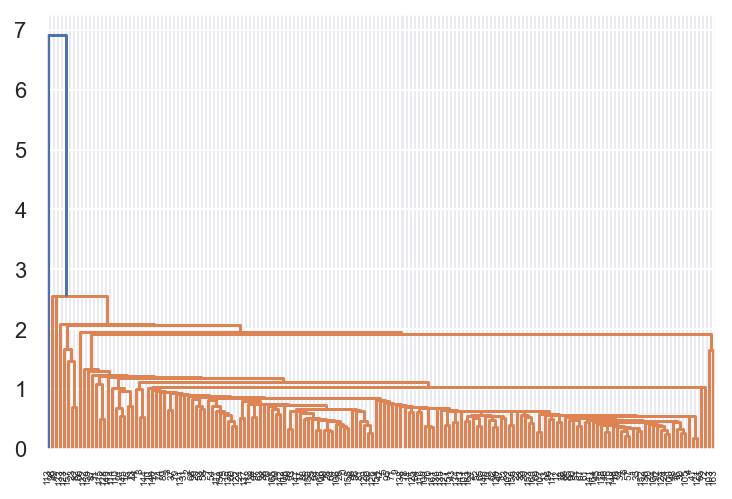

In [30]:
# Checking the clusters with single linkage 
single_linkage = linkage(scaled_data)
dendrogram(single_linkage)
plt.show()

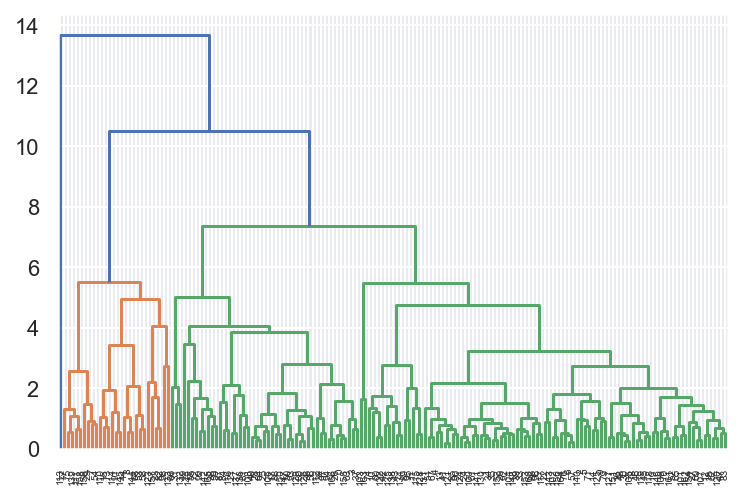

In [31]:
# Checking the clusters with complete linkage 
complete_linkage = linkage(scaled_data,method="complete")
dendrogram(complete_linkage)
plt.show()

In [32]:
# From the complete linkage we can have 4 clusters from the dataset
cluster_labels = cut_tree(complete_linkage,n_clusters=4).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [33]:
# From complete linkage it can be said that we can have 4 types of clusters 
data['Cluster_labels'] = cluster_labels
data.head()

country  child_mort      exports    health   imports   income  \
0          Afghanistan        90.2    56.685328   41.9174   248.297   1610.0   
1              Albania        16.6  1145.200000  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.640000  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.190000  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.000000  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_ID  Cluster_labels  
0       9.44        56.2       5.82    553.0           0               0  
1       4.49        76.3       1.65   4090.0           1               1  
2      16.10        76.5       2.89   4460.0           1               1  
3      22.40        60.1       6.16   3530.0           0               0  
4       1.44        76.8       2.13  12200.0           1               1

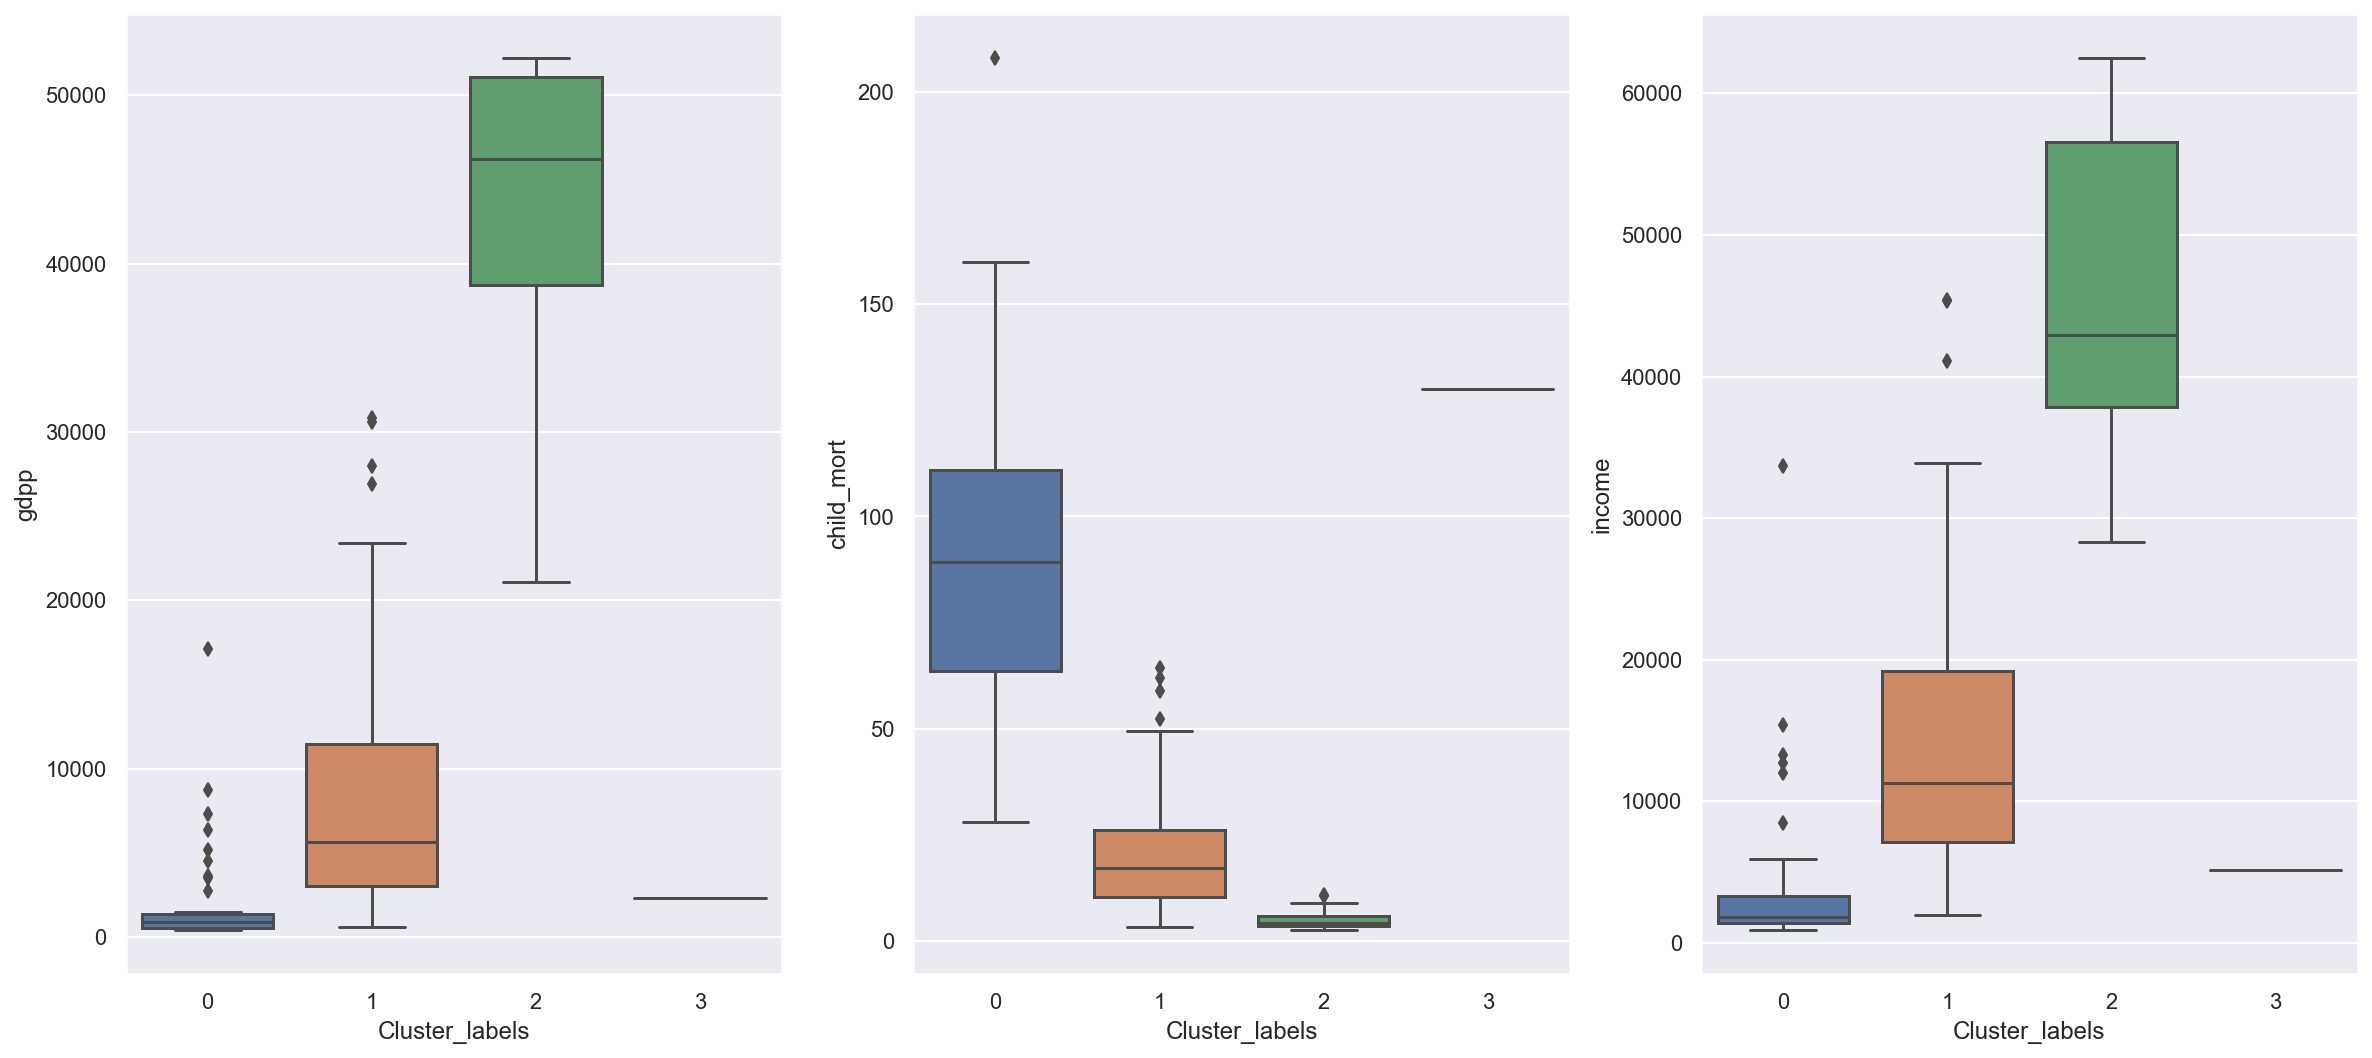

In [34]:
c = data[["gdpp","child_mort","income"]]
plt.figure(figsize=(20,30))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x="Cluster_labels",y=data[i[1]],data=data)

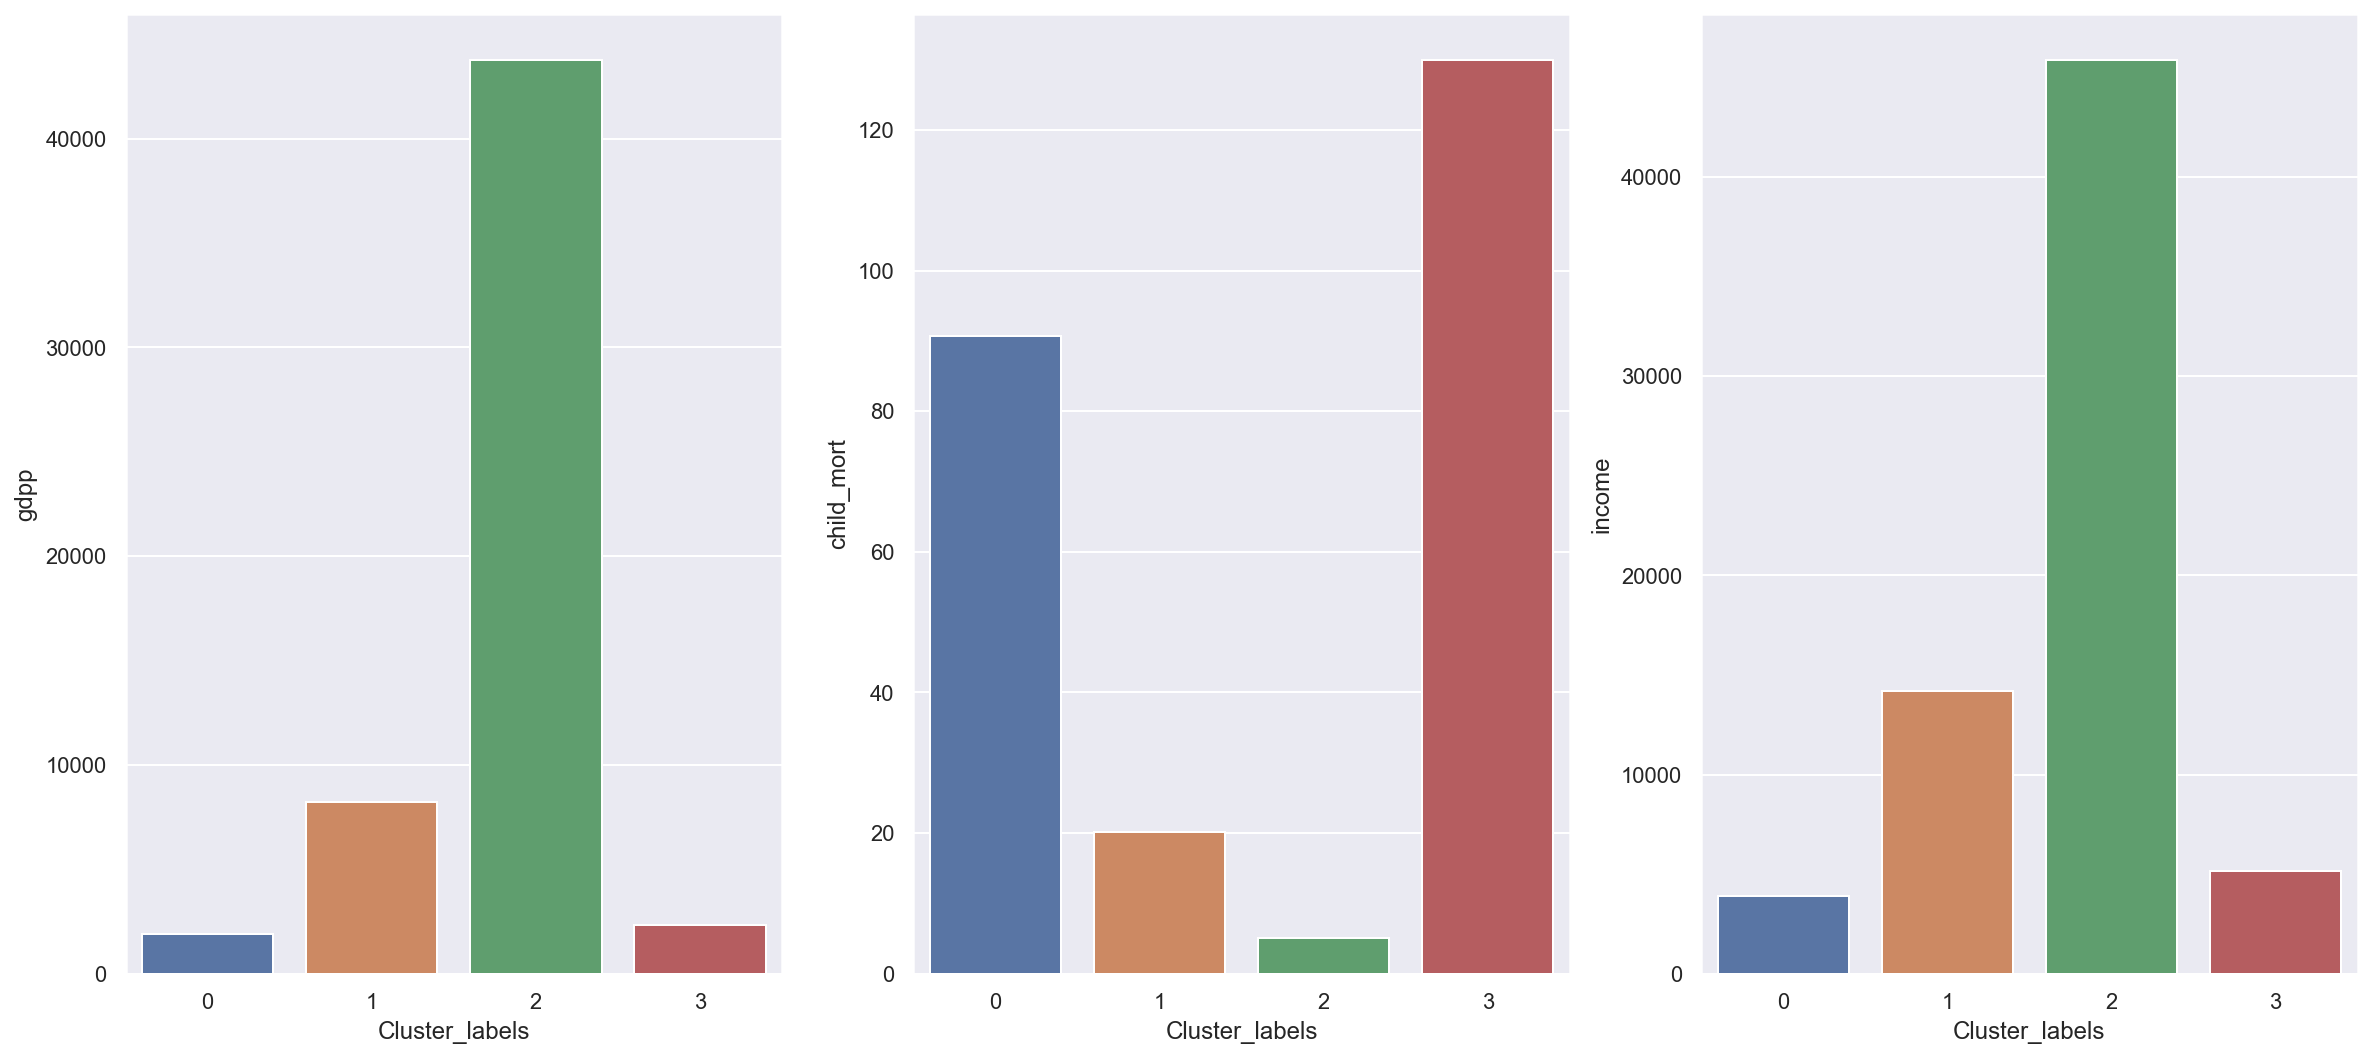

In [35]:
c = data[["gdpp","child_mort","income"]]
plt.figure(figsize=(20,30))
for i in enumerate(c):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x="Cluster_labels",y=data[i[1]],data=data,ci=None)

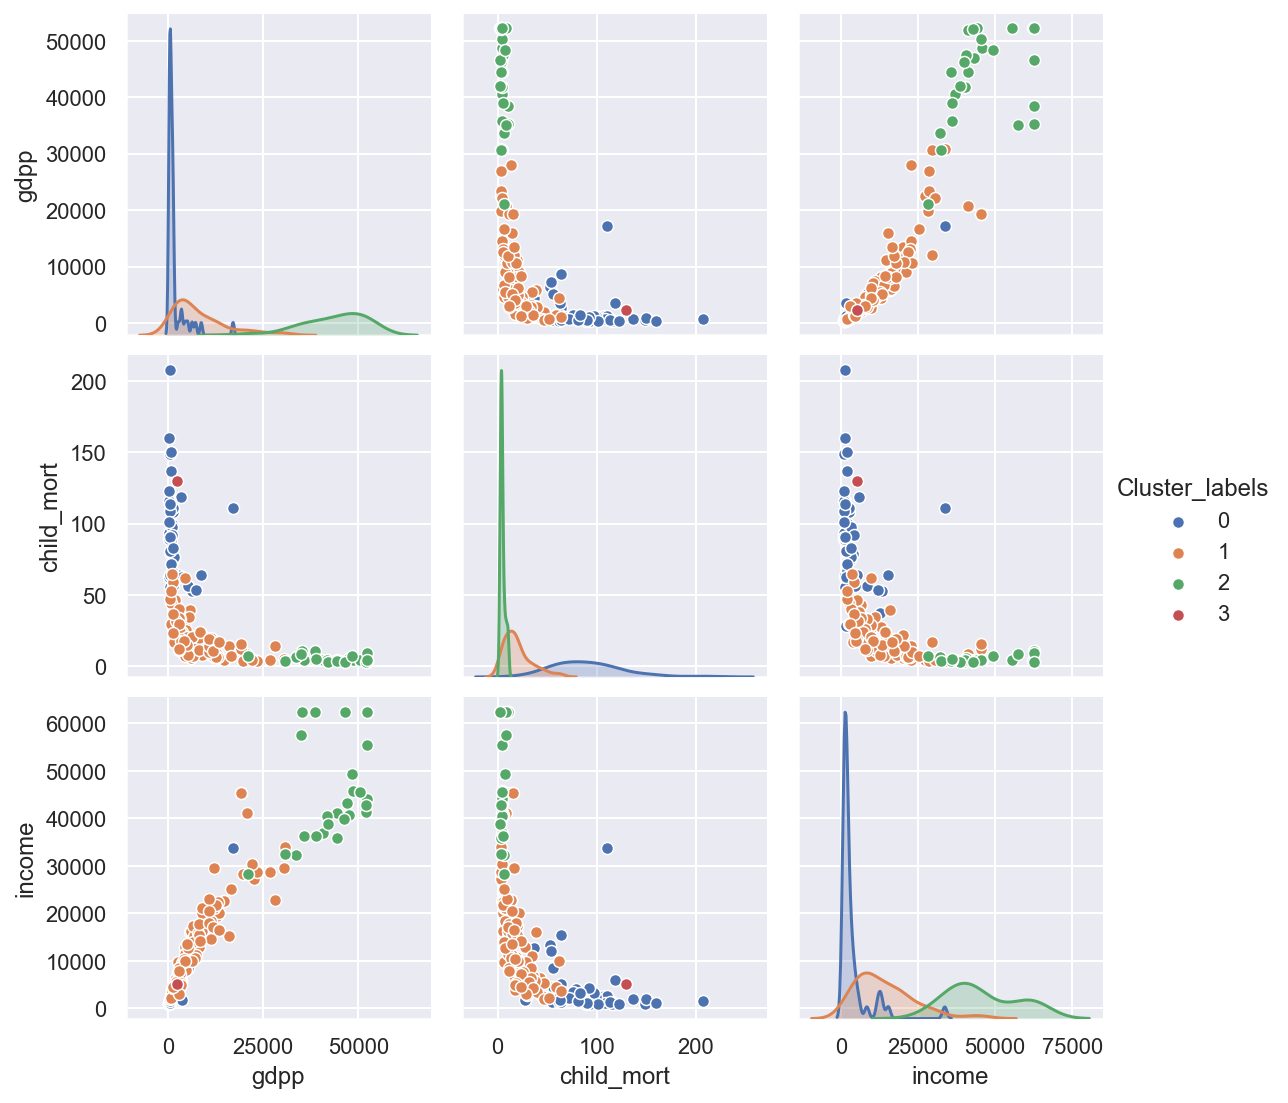

In [36]:
pairplot = data[["gdpp","child_mort","income","Cluster_labels"]]
sns.pairplot(pairplot,hue="Cluster_labels")
plt.show()

###### From the complete linkage we are getting 4 types of clusters but after examining the plots we can say that 'Cluster-0 and Cluster-3' shows same type of pattern and therefore can be clubbed into single group of 'Developing countries' as defined in the K-Means, 'Cluster 1' as Emerging countries and 'Cluster-2' as 'Developed countries', all the other inferences will remain same as kmeans.

In [37]:
# Group-0 and Group-3: Developing countries
Developing_countries = data[(data['Cluster_labels']==0)| (data['Cluster_labels']==3)]
Developing_countries.head(10)

country  child_mort      exports      health     imports  \
0                Afghanistan        90.2    56.685328   41.917400   248.29700   
3                     Angola       119.0  2199.190000  100.605000  1514.37000   
17                     Benin       111.0   180.404000   31.078000   281.97600   
21                  Botswana        52.5  2768.600000  527.050000  3257.55000   
25              Burkina Faso       116.0   110.400000   38.755000   170.20000   
26                   Burundi        93.6    56.685328   26.796000   159.74028   
28                  Cameroon       108.0   290.820000   67.203000   353.70000   
31  Central African Republic       149.0    56.685328   21.782574   159.74028   
32                      Chad       150.0   330.096000   40.634100   390.19500   
36                   Comoros        88.2   126.885000   34.681900   397.57300   

     income  inflation  life_expec  total_fer     gdpp  Cluster_ID  \
0    1610.0      9.440      56.200       5.82   553.00           0   
3    5900.0     22.400      60.100       6.16  3530.00           0   
17   1820.0      0.885      61.800       5.36   758.00           0   
21  13300.0      8.920      57.100       2.88  6350.00           0   
25   1430.0      6.810      57.900       5.87   575.00           0   
26    917.4     12.300      57.700       6.26   412.72           0   
28   2660.0      1.910      57.300       5.11  1310.00           0   
31    917.4      2.010      54.276       5.21   446.00           0   
32   1930.0      6.390      56.500       6.59   897.00           0   
36   1410.0      3.870      65.900       4.75   769.00           0   

    Cluster_labels  
0                0  
3                0  
17               0  
21               0  
25               0  
26               0  
28               0  
31               0  
32               0  
36               0

In [38]:
# Group-1: Emerging countries
Emerging_countries = data[data['Cluster_labels']==1]
Emerging_countries.head(10)

country  child_mort   exports     health    imports   income  \
1               Albania        16.6   1145.20   267.8950   1987.740   9930.0   
2               Algeria        27.3   1712.64   185.9820   1400.440  12900.0   
4   Antigua and Barbuda        10.3   5551.00   735.6600   7185.800  19100.0   
5             Argentina        14.5   1946.70   834.3000   1648.000  18700.0   
6               Armenia        18.1    669.76   141.6800   1458.660   6700.0   
9            Azerbaijan        39.2   3171.12   343.3920   1208.880  16000.0   
10              Bahamas        13.8   9800.00  2209.2000  12236.000  22900.0   
11              Bahrain         8.6  14386.50  1028.7900  10536.300  41100.0   
12           Bangladesh        49.4    121.28    26.6816    165.244   2440.0   
13             Barbados        14.2   6320.00  1275.2000   7792.000  15300.0   

    inflation  life_expec  total_fer     gdpp  Cluster_ID  Cluster_labels  
1       4.490        76.3       1.65   4090.0           1               1  
2      16.100        76.5       2.89   4460.0           1               1  
4       1.440        76.8       2.13  12200.0           1               1  
5      20.900        75.8       2.37  10300.0           1               1  
6       7.770        73.3       1.69   3220.0           1               1  
9      13.800        69.1       1.92   5840.0           1               1  
10     -0.393        73.8       1.86  28000.0           1               1  
11      7.440        76.0       2.16  20700.0           1               1  
12      7.140        70.4       2.33    758.0           1               1  
13      0.321        76.7       1.78  16000.0           1               1

In [39]:
# Group-2: Developed countries
Developed_countries = data[data['Cluster_labels']==2]
Developed_countries.head(10)

country  child_mort  exports    health    imports   income  inflation  \
7   Australia         4.8  10276.2  4530.870  10847.100  41400.0      1.160   
8     Austria         4.3  24059.7  5159.000  22418.200  43200.0      0.873   
15    Belgium         4.5  33921.6  4750.800  32507.456  41100.0      1.880   
23     Brunei        10.5  23792.2  1002.520   9884.000  62496.0     16.700   
29     Canada         5.6  13793.4  5356.200  14694.000  40700.0      2.870   
44    Denmark         4.1  29290.0  5998.226  25288.000  44000.0      3.220   
53    Finland         3.0  17879.4  4134.900  17278.800  39800.0      0.351   
54     France         4.2  10880.8  4831.400  11408.600  36900.0      1.050   
58    Germany         4.2  17681.4  4848.800  15507.800  40400.0      0.758   
68    Iceland         2.6  22374.6  3938.600  18142.700  38800.0      5.470   

    life_expec  total_fer     gdpp  Cluster_ID  Cluster_labels  
7       81.902       1.93  51900.0           2               2  
8       80.500       1.44  46900.0           2               2  
15      80.000       1.86  44400.0           2               2  
23      77.100       1.84  35300.0           2               2  
29      81.300       1.63  47400.0           2               2  
44      79.500       1.87  52218.0           2               2  
53      80.000       1.87  46200.0           2               2  
54      81.400       2.03  40600.0           2               2  
58      80.100       1.39  41800.0           2               2  
68      81.902       2.20  41900.0           2               2

In [40]:
# Total number of countries in each cluster
print(f'Developing_countries :{Developing_countries.shape[0]}')
print(f'Emerging_countries :{Emerging_countries.shape[0]}')
print(f'Developed_countries :{Developed_countries.shape[0]}')

Developing_countries :48
Emerging_countries :92
Developed_countries :27


In [41]:
# Top 10 countries who are in direst need of aid
final_countries = data[(data['Cluster_labels']==0)|(data['Cluster_labels']==3)].sort_values(by
                =["child_mort",'gdpp','income'],ascending=[False,True,True])
final_countries = final_countries[["country"]].head(10)
final_countries

country
66                      Haiti
132              Sierra Leone
32                       Chad
31   Central African Republic
97                       Mali
113                   Nigeria
112                     Niger
3                      Angola
37           Congo, Dem. Rep.
25               Burkina Faso

# Summary

##### In the above analysis for HELP international we have used the K-Means and Hierarchical clustering analysis for segregating out the countries and also finding out the countries that are in the direst need of the aid. From the analysis we have came to a conclusion that these countries can be divided into three groups 
- Developed countries
- Emerging countries
- Developing countries

##### Even though the analysis is done though two types of clustering methods and the number of clusters are different for both the analysis (KMeans-3 clusters and Hierarchical clustering-4 clusters) but ultimately we have been getting the same countries form both the clustering methods which are listed below:
Haiti, Sierra Leone, Chad, Central African Republic, Mali, Nigeria, Niger, Angola,Burkina Faso, and Congo, Dem. Rep.